## Hierarchy Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
Univ = pd.read_csv('Copy of Universities.csv')
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
def scaled_fun(i):
    x = (i-np.min(i))/(np.max(i)-np.min(i))
    return x

In [4]:
df_norm = scaled_fun(Univ.iloc[:,1:])
df_norm

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\HP\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


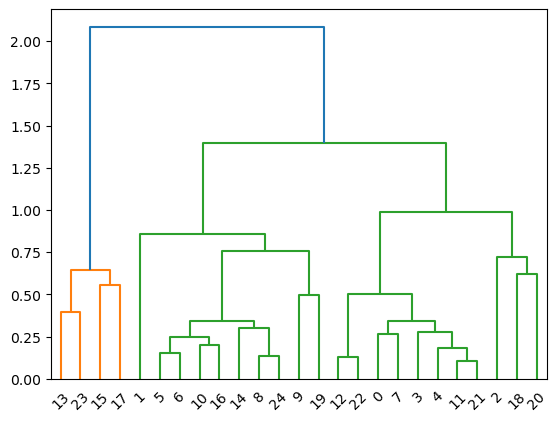

In [5]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

<AxesSubplot:>

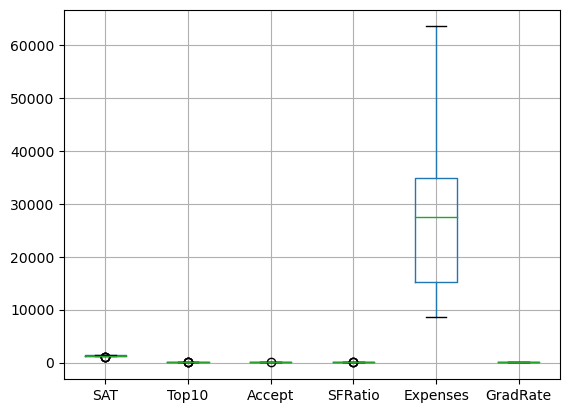

In [6]:
Univ.boxplot()

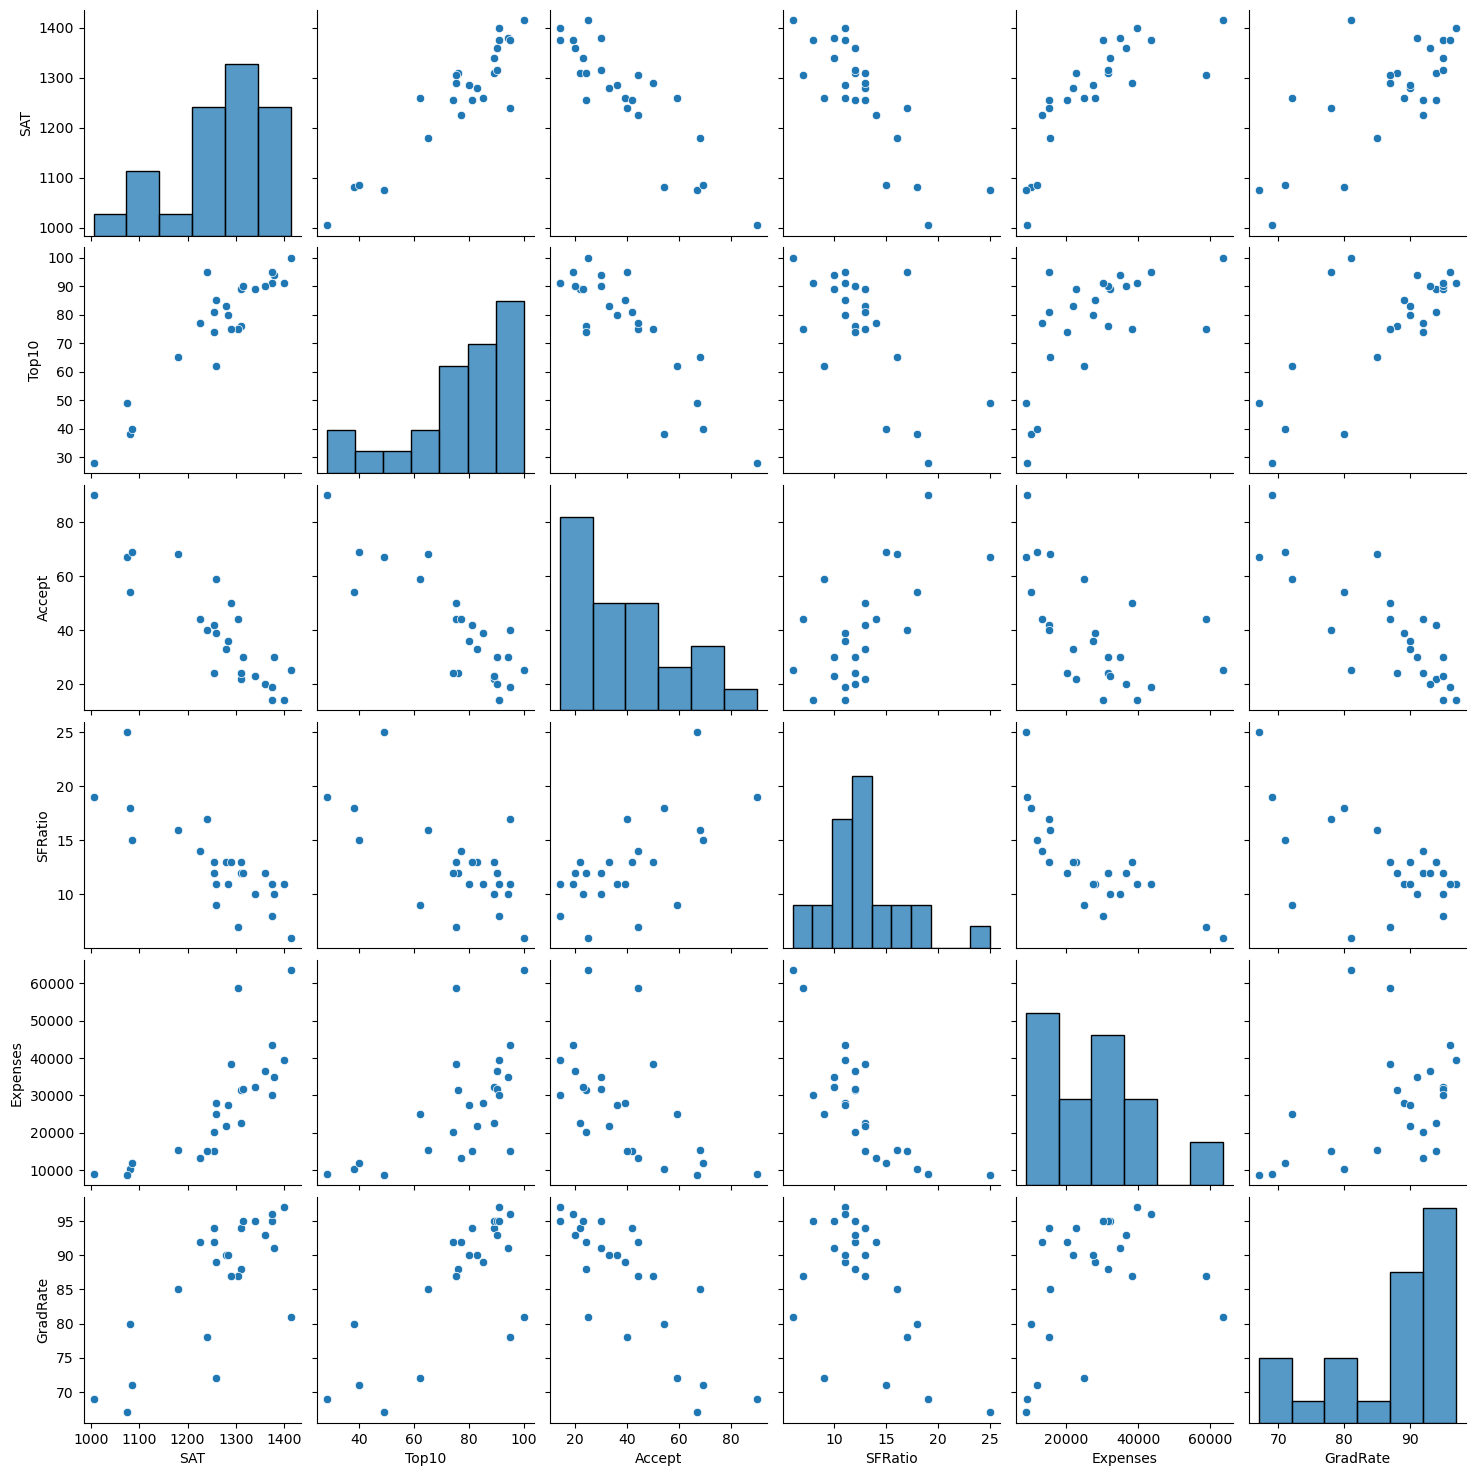

In [7]:
sns.pairplot(Univ)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Top10', ylabel='Density'>

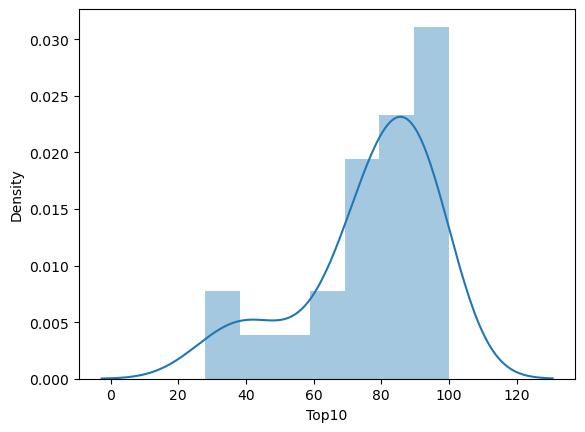

In [8]:
sns.distplot(Univ.Top10)

In [9]:
hc_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
hc_model.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [10]:
y_hc = hc_model.fit_predict(df_norm)
y_hc

array([3, 0, 2, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 1, 0, 1, 2, 0, 2, 3,
       3, 1, 0], dtype=int64)

In [11]:
Univ['h_clusterId'] = y_hc
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterId
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3


In [12]:
Univ[Univ['h_clusterId']==3]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterId
0,Brown,1310,89,22,13,22704,94,3
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
7,Georgetown,1255,74,24,12,20126,92,3
11,Northwestern,1260,85,39,11,28052,89,3
12,NotreDame,1255,81,42,13,15122,94,3
21,UPenn,1285,80,36,11,27553,90,3
22,UVA,1225,77,44,14,13349,92,3


In [13]:
Univ[Univ['h_clusterId']==1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterId
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
23,UWisconsin,1085,40,69,15,11857,71,1


In [14]:
Univ[Univ['h_clusterId']==2]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterId
2,CMU,1260,62,59,9,25026,72,2
18,UCBerkeley,1240,95,40,17,15140,78,2
20,UMichigan,1180,65,68,16,15470,85,2


In [15]:
Univ[Univ['h_clusterId']==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterId
1,CalTech,1415,100,25,6,63575,81,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0
10,MIT,1380,94,30,10,34870,91,0
14,Princeton,1375,91,14,8,30220,95,0
16,Stanford,1360,90,20,12,36450,93,0
19,UChicago,1290,75,50,13,38380,87,0
24,Yale,1375,95,19,11,43514,96,0


In [16]:
Univ1 = Univ.sort_values('h_clusterId')
Univ1

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterId
24,Yale,1375,95,19,11,43514,96,0
16,Stanford,1360,90,20,12,36450,93,0
14,Princeton,1375,91,14,8,30220,95,0
19,UChicago,1290,75,50,13,38380,87,0
10,MIT,1380,94,30,10,34870,91,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0
5,Dartmouth,1340,89,23,10,32162,95,0
1,CalTech,1415,100,25,6,63575,81,0
6,Duke,1315,90,30,12,31585,95,0


(array([10.,  0.,  0.,  4.,  0.,  0.,  3.,  0.,  0.,  8.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

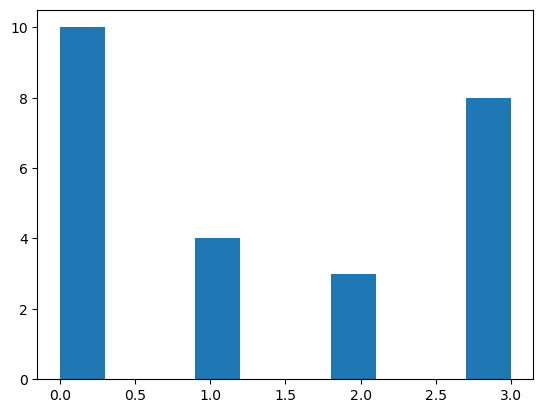

In [17]:
plt.hist(Univ.h_clusterId)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [19]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True).frame
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


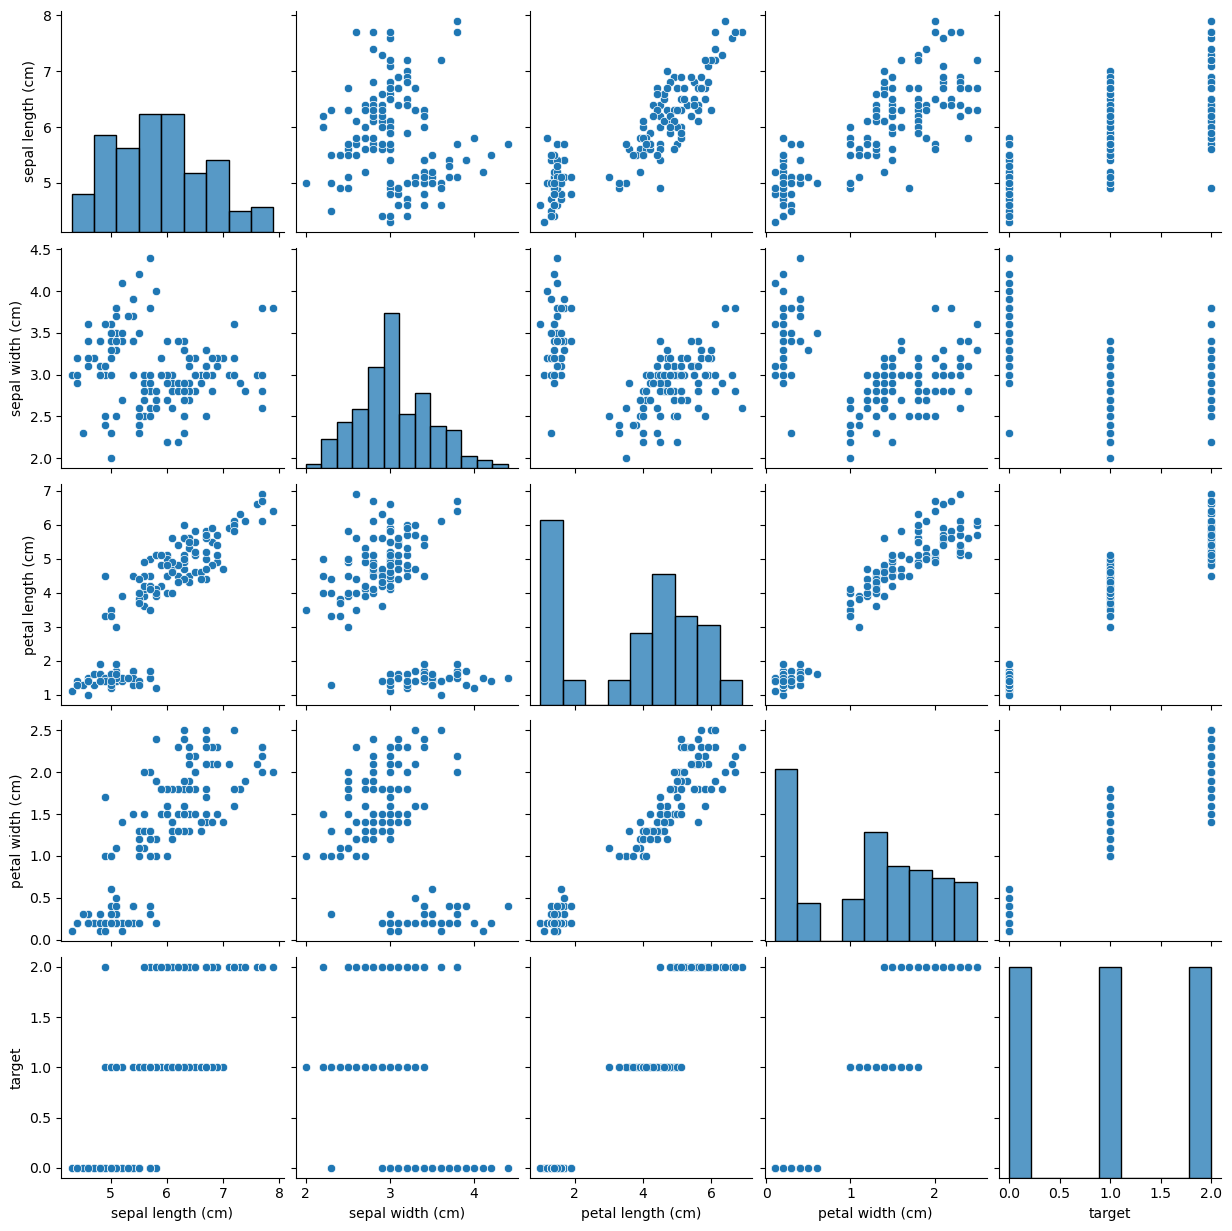

In [20]:
sns.pairplot(iris)

<AxesSubplot:>

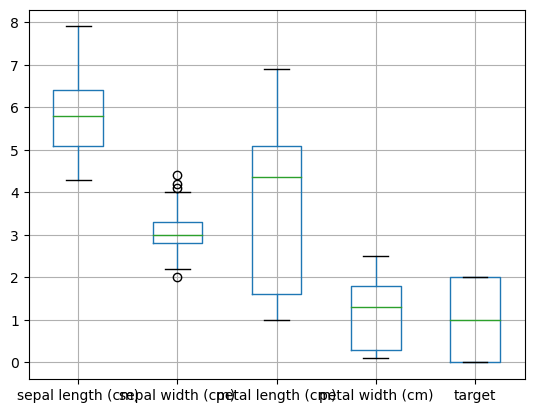

In [21]:
iris.boxplot()

In [22]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


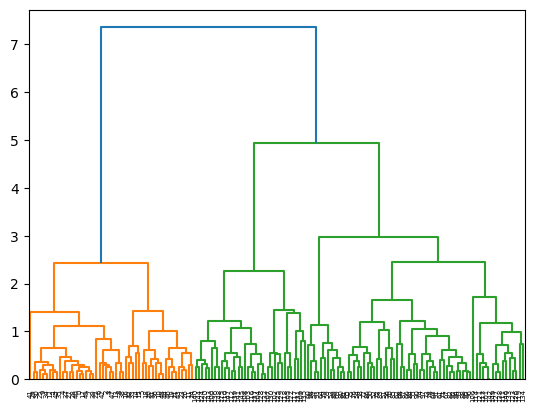

In [23]:
#dendrogram
iris_dendrogram = sch.dendrogram(sch.linkage(iris, method='complete'))

In [24]:
iris.shape

(150, 5)

In [25]:
standard = StandardScaler()
std_iris = standard.fit_transform(iris.iloc[:,0:4])
std_iris

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [26]:
X = iris.iloc[:,0:4]
Y = iris.target

In [27]:
iris.target.unique()

array([0, 1, 2])

In [28]:
hc_iris = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
hc_iris.fit(std_iris)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [29]:
iris_y_pred = hc_iris.fit_predict(std_iris)
iris_y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
iris['h_cluster_iris'] = iris_y_pred
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,h_cluster_iris
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

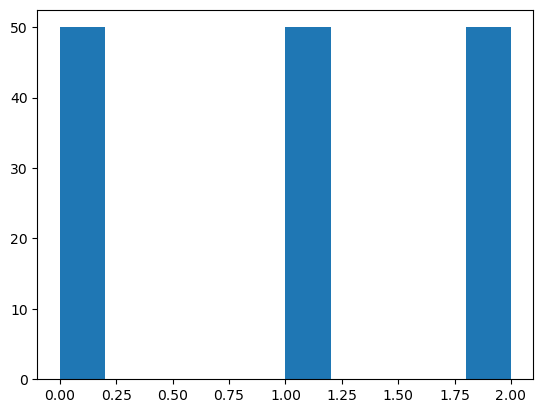

In [31]:
plt.hist(iris.target)

(array([77.,  0.,  0.,  0.,  0., 49.,  0.,  0.,  0., 24.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

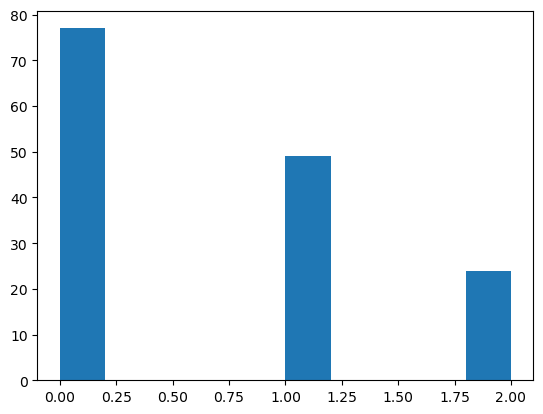

In [32]:
plt.hist(iris.h_cluster_iris)

## KMeans

In [33]:
from sklearn.cluster import KMeans

In [34]:
Univ = pd.read_csv('Copy of Universities.csv')
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_univ_df = scaler.fit_transform(Univ.iloc[:,1:])
scaled_univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [36]:
kmeans = KMeans(n_clusters=3, random_state=0)
predict=kmeans.fit_predict(scaled_univ_df)

In [37]:
predict

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


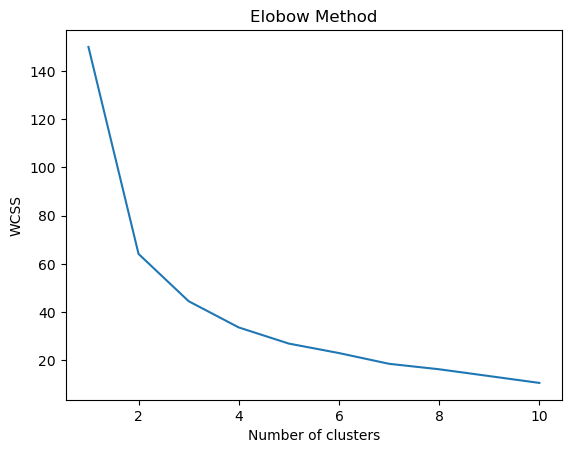

In [38]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_univ_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elobow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
Univ['clusterid_new'] = predict
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [40]:
Univ.groupby('clusterid_new').agg(['mean']).reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_111184\1373723157.py:1: FutureWarning: ['Univ'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  Univ.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,2,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333


## DBSCAN

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [44]:
df =  pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [47]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [54]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [56]:
df['Channel'].unique()

array([2, 1], dtype=int64)

In [57]:
df['Region'].unique()

array([3, 1, 2], dtype=int64)

In [58]:
df.shape

(440, 8)

In [59]:
df[df.duplicated()].shape

(0, 8)

In [62]:
df.drop(['Channel','Region'], axis=1, inplace=True)


KeyError: "['Channel', 'Region'] not found in axis"

In [63]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [66]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [67]:
dbscan = DBSCAN(eps=3, min_samples=3)
dbscan.fit_predict(df_scaled)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [68]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [69]:
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
435,0
436,0
437,0
438,0


In [72]:
clustered = pd.concat([df, cl],axis=1)
clustered

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


In [75]:
clustered[clustered['cluster']==-1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
23,26373,36423,22019,5154,4337,16523,-1
47,44466,54259,55571,7782,24171,6465,-1
61,35942,38369,59598,3254,26701,2017,-1
71,18291,1266,21042,5373,4173,14472,-1
85,16117,46197,92780,1026,40827,2944,-1
86,22925,73498,32114,987,20070,903,-1
87,43265,5025,8117,6312,1579,14351,-1
93,11314,3090,2062,35009,71,2698,-1
181,112151,29627,18148,16745,4948,8550,-1
183,36847,43950,20170,36534,239,47943,-1


In [76]:
clustered.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
cluster                -0.027273
dtype: float64